Md. Irfan Hossain, Senior Program Officer, Data Analyst, GIRL Center, Population Council

##### Objectives:
###### Performing Classification Trees
 - Importing the dataset
 - Explaining the features and target variable
 - Performing appropriate data preprocessing including Label or One-hot Encoding
 - Perform Data Transformation (StandardScaler or MinMaxScaler)
 - Spliting the original dataset into the train set (80%) and the test set (20%) with addition of random state and stratification
 - Performing the training with Decision Tree Classifier
 - Producing a tree diagram of the Decision Tree
 - Perform Grid Search and Cross-Validation
 - Finding the Confusion Matrix, Classification report, and ROC-AUC
 - Finding accuracy, precision, recall, f1 score

#### Import required libraries and packages

In [1]:
# to build a classification tree
from sklearn.tree import DecisionTreeClassifier
# to draw a classification tree
from sklearn.tree import plot_tree
# to split data into training and testing sets
from sklearn.model_selection import train_test_split
# to grid search and cross-validate
from sklearn.model_selection import GridSearchCV, cross_val_score
# to build a confusion matrix, classification report, ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
# to plot a confusion matrix
from sklearn.metrics import plot_confusion_matrix
# for label encoding, standardization and 0 to 1 range data transformation
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# to load & analyze data and perform One-Hot Encoding
import pandas as pd
# to load maximum 100 row and columns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# to analyze data
import numpy as np
# to plot
import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Read data file as dataframe

In [2]:
df = pd.read_csv("Churn.csv")
# to display first 10 rows of the dataset
display(df.head(10))
# to print the dimensions (number of rows and columns) of the dataset
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)


In [3]:
# Checking missing values, column types for consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [4]:
# to check unique values of Object/String variables
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())
print(df['State'].unique())
print(df['Area_Code'].unique())
print(df['Phone'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[415 408 510]
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']


In [5]:
#Since **State** and **Phone** have too unique values lets see their numbers
print(len(df['State'].unique()))
len(df['Phone'].unique())

51


3333

***Comment***: Looking at the column names & data preview, I came up with following plausible explanation and possible value codings

#### Features

0. **Account_Length**: Length of availing the service from this telecom
1. **Vmail_Message**: Number of Voice mail message sent
2. **Day_Mins**: Number of mintues talked during day time
3. **Eve_Mins**: Number of mintues talked during evening time
4. **Night_Mins**: Number of mintues talked during night time
5. **Intl_Mins**: Number of mintues talked internationally
6. **CustServ_Calls**: Number of times called at Customer Care for services


8. **Intl_Plan**: Availing International plan or not (yes; no)
9. **Vmail_Plan**: Availing Voice mail plan or not (yes; no)
10. **Day_Calls**: Number of calls during day time
11. **Day_Charge**: Total bills for day time calls
12. **Eve_Calls**: Number of calls during evening time
13. **Eve_Charge**: Total bills for evening time calls
14. **Night_Calls**: Number of calls during night time
15. **Night_Charge**: Total bills for night time calls
16. **Intl_Calls**: Number of international calls
17. **Intl_Charge**: Total bills for international calls
18. **State**: US State name of the customer (51 Values: AK=Alaska, AL=Alabama,...,WY=Wyoming)
19. **Area_Code**: US Area code of the customer (3 Values: 415, 510, 408)
20. **Phone**: Phone number of the customer (3333 unique values each has 7 numeric digits with a hyphen after 3rd digit from left)

#### Target variable

7. **Churn**: Churn status of the customer (yes; no)

#### Checking frequencies of Target variable

In [6]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

**Comment**:This provides evidence that when splitting data into training and test we should consider startification.

#### Data Preprocessing

**Comment**: As the dataset has 20 features which will not only make any model complex but also lengthen the run time. So we need to trade off some irrelevant features if any. Carefully making judgemental call by looking at data preview we can make a quick decision about discarding **State**, **Area_Code** and **Phone** from further analysis. Obviously we can employ EDA to back our proposition but in this task we will focus more on ML than EDA.

In [7]:
# to discard irrelevant features from dataset
df=df.drop(['State','Area_Code','Phone'],axis=1)
# to display first 10 rows of the dataset
display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02


**Comment**: Now we have to convert string variables into numerical categorical variable. We will employ **label encoding** since the remaining Object/string variables are binary (Yes,No). So One-Hot encoding may not add any extra value in this case.

In [8]:
LE = LabelEncoder()

df['Churn'] = LE.fit_transform(df['Churn'])
df['Vmail_Plan'] = LE.fit_transform(df['Vmail_Plan'])
df['Intl_Plan'] = LE.fit_transform(df['Intl_Plan'])

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


**Comment**: Now for numerical variables we have to perform transformation and check whether these will improve our tree-based machine learning models.

#### Data Transformation

In [9]:
SS = StandardScaler()

df2=SS.fit_transform(df)
df2=pd.DataFrame(df2)
# setting up the column names
df2.columns = ['Account_Length',
              'Vmail_Message',
              'Day_Mins',
              'Eve_Mins',
              'Night_Mins',
              'Intl_Mins',
              'CustServ_Calls',
              'Churn',
              'Intl_Plan',
              'Vmail_Plan',
              'Day_Calls',
              'Day_Charge',
              'Eve_Calls',
              'Eve_Charge',
              'Night_Calls',
              'Night_Charge',
              'Intl_Calls',
              'Intl_Charge']

display(df2.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,-0.411672,-0.327580,1.617086,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,-0.411672,-0.327580,1.617086,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,-0.411672,-0.327580,-0.618396,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-0.411672,3.052685,-0.618396,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,-0.411672,3.052685,-0.618396,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885
5,0.425335,-0.591760,0.801056,0.386928,0.059881,-1.410498,-1.188218,-0.411672,3.052685,-0.618396,-0.121381,0.801216,0.044463,0.386648,0.914473,0.061821,0.617898,-1.412550
6,0.500681,1.161817,0.705572,2.909300,0.231933,-0.980610,1.092641,-0.411672,-0.327580,1.617086,-0.619735,0.705083,0.395875,2.908677,0.914473,0.233209,1.024263,-0.974686
7,1.153683,-0.591760,-0.418205,-1.930341,0.216112,-1.123906,-1.188218,-0.411672,3.052685,-0.618396,-1.068253,-0.418264,-0.306949,-1.931206,-0.209945,0.215631,0.617898,-1.120641
8,0.400220,-0.591760,0.086760,2.970436,0.295216,-0.550721,-0.427932,-0.411672,-0.327580,-0.618396,-0.171217,0.087242,-1.009773,2.971322,-0.516604,0.294733,-0.194831,-0.550091
9,1.002990,2.111671,1.447412,0.414538,2.482445,0.344880,-1.188218,-0.411672,3.052685,1.617086,-0.819076,1.447141,0.546480,0.414490,-0.158835,2.483233,0.211534,0.338904


In [10]:
MMS = MinMaxScaler()

df3 = MMS.fit_transform(df)
df3 = pd.DataFrame(df3)

# setting up the column names
df3.columns = ['Account_Length',
              'Vmail_Message',
              'Day_Mins',
              'Eve_Mins',
              'Night_Mins',
              'Intl_Mins',
              'CustServ_Calls',
              'Churn',
              'Intl_Plan',
              'Vmail_Plan',
              'Day_Calls',
              'Day_Charge',
              'Eve_Calls',
              'Eve_Charge',
              'Night_Calls',
              'Night_Charge',
              'Intl_Calls',
              'Intl_Charge']
display(df3.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.524793,0.490196,0.755701,0.542755,0.595750,0.500,0.111111,0.0,0.0,1.0,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000
1,0.438017,0.509804,0.460661,0.537531,0.621840,0.685,0.111111,0.0,0.0,1.0,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185
2,0.561983,0.000000,0.693843,0.333242,0.374933,0.610,0.000000,0.0,0.0,0.0,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259
3,0.342975,0.000000,0.853478,0.170195,0.467187,0.330,0.222222,0.0,1.0,0.0,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630
4,0.305785,0.000000,0.475200,0.407754,0.440290,0.505,0.333333,0.0,1.0,0.0,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556
5,0.483471,0.000000,0.636830,0.606544,0.486014,0.315,0.000000,0.0,1.0,0.0,0.593939,0.636821,0.594118,0.606600,0.598592,0.486551,0.30,0.314815
6,0.495868,0.470588,0.622007,0.958207,0.509414,0.375,0.333333,0.0,0.0,1.0,0.533333,0.621898,0.635294,0.958266,0.598592,0.509863,0.35,0.375926
7,0.603306,0.000000,0.447548,0.283475,0.507262,0.355,0.000000,0.0,1.0,0.0,0.478788,0.447518,0.552941,0.283403,0.443662,0.507472,0.30,0.355556
8,0.479339,0.000000,0.525941,0.966731,0.518020,0.435,0.111111,0.0,0.0,0.0,0.587879,0.525989,0.470588,0.967001,0.401408,0.518231,0.20,0.435185
9,0.578512,0.725490,0.737172,0.610393,0.815492,0.560,0.000000,0.0,1.0,1.0,0.509091,0.737089,0.652941,0.610482,0.450704,0.815900,0.25,0.559259


**Comment**: So far among the both transformation MinMaxScalar seems not to have any impact on our object variables and numerical variables are currently having uniform range (0,1). 

#### Separating features and the target variable

In [11]:
target = ['Churn']

X = df3.drop('Churn', axis=1)
y = df3[target]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Spliting the original dataset into the train set (80%) and the test set (20%)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


#### Checking whether stratification worked or not

In [13]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train

print (train_ratio)

0.1692982456140351


In [14]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test

print (test_ratio)

0.17017543859649123


**Comment**: In both training and test datasets, 17% of Churn cases indicates our stratifcation worked

#### Performing training: Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier(random_state=123)
model = model.fit(X_train, y_train)

#### Prediction

In [16]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [17]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_churn'] = y_pred

display(y_test.head(10))

,Churn,probability,predicted_churn
2794,1.0,0.0,0.0
2619,1.0,1.0,1.0
720,0.0,0.0,0.0
371,0.0,0.0,0.0
57,1.0,1.0,1.0
1294,0.0,0.0,0.0
155,0.0,0.0,0.0
1275,0.0,1.0,1.0
2830,0.0,0.0,0.0
2924,1.0,1.0,1.0


#### Producing a tree diagram of the Decision Tree

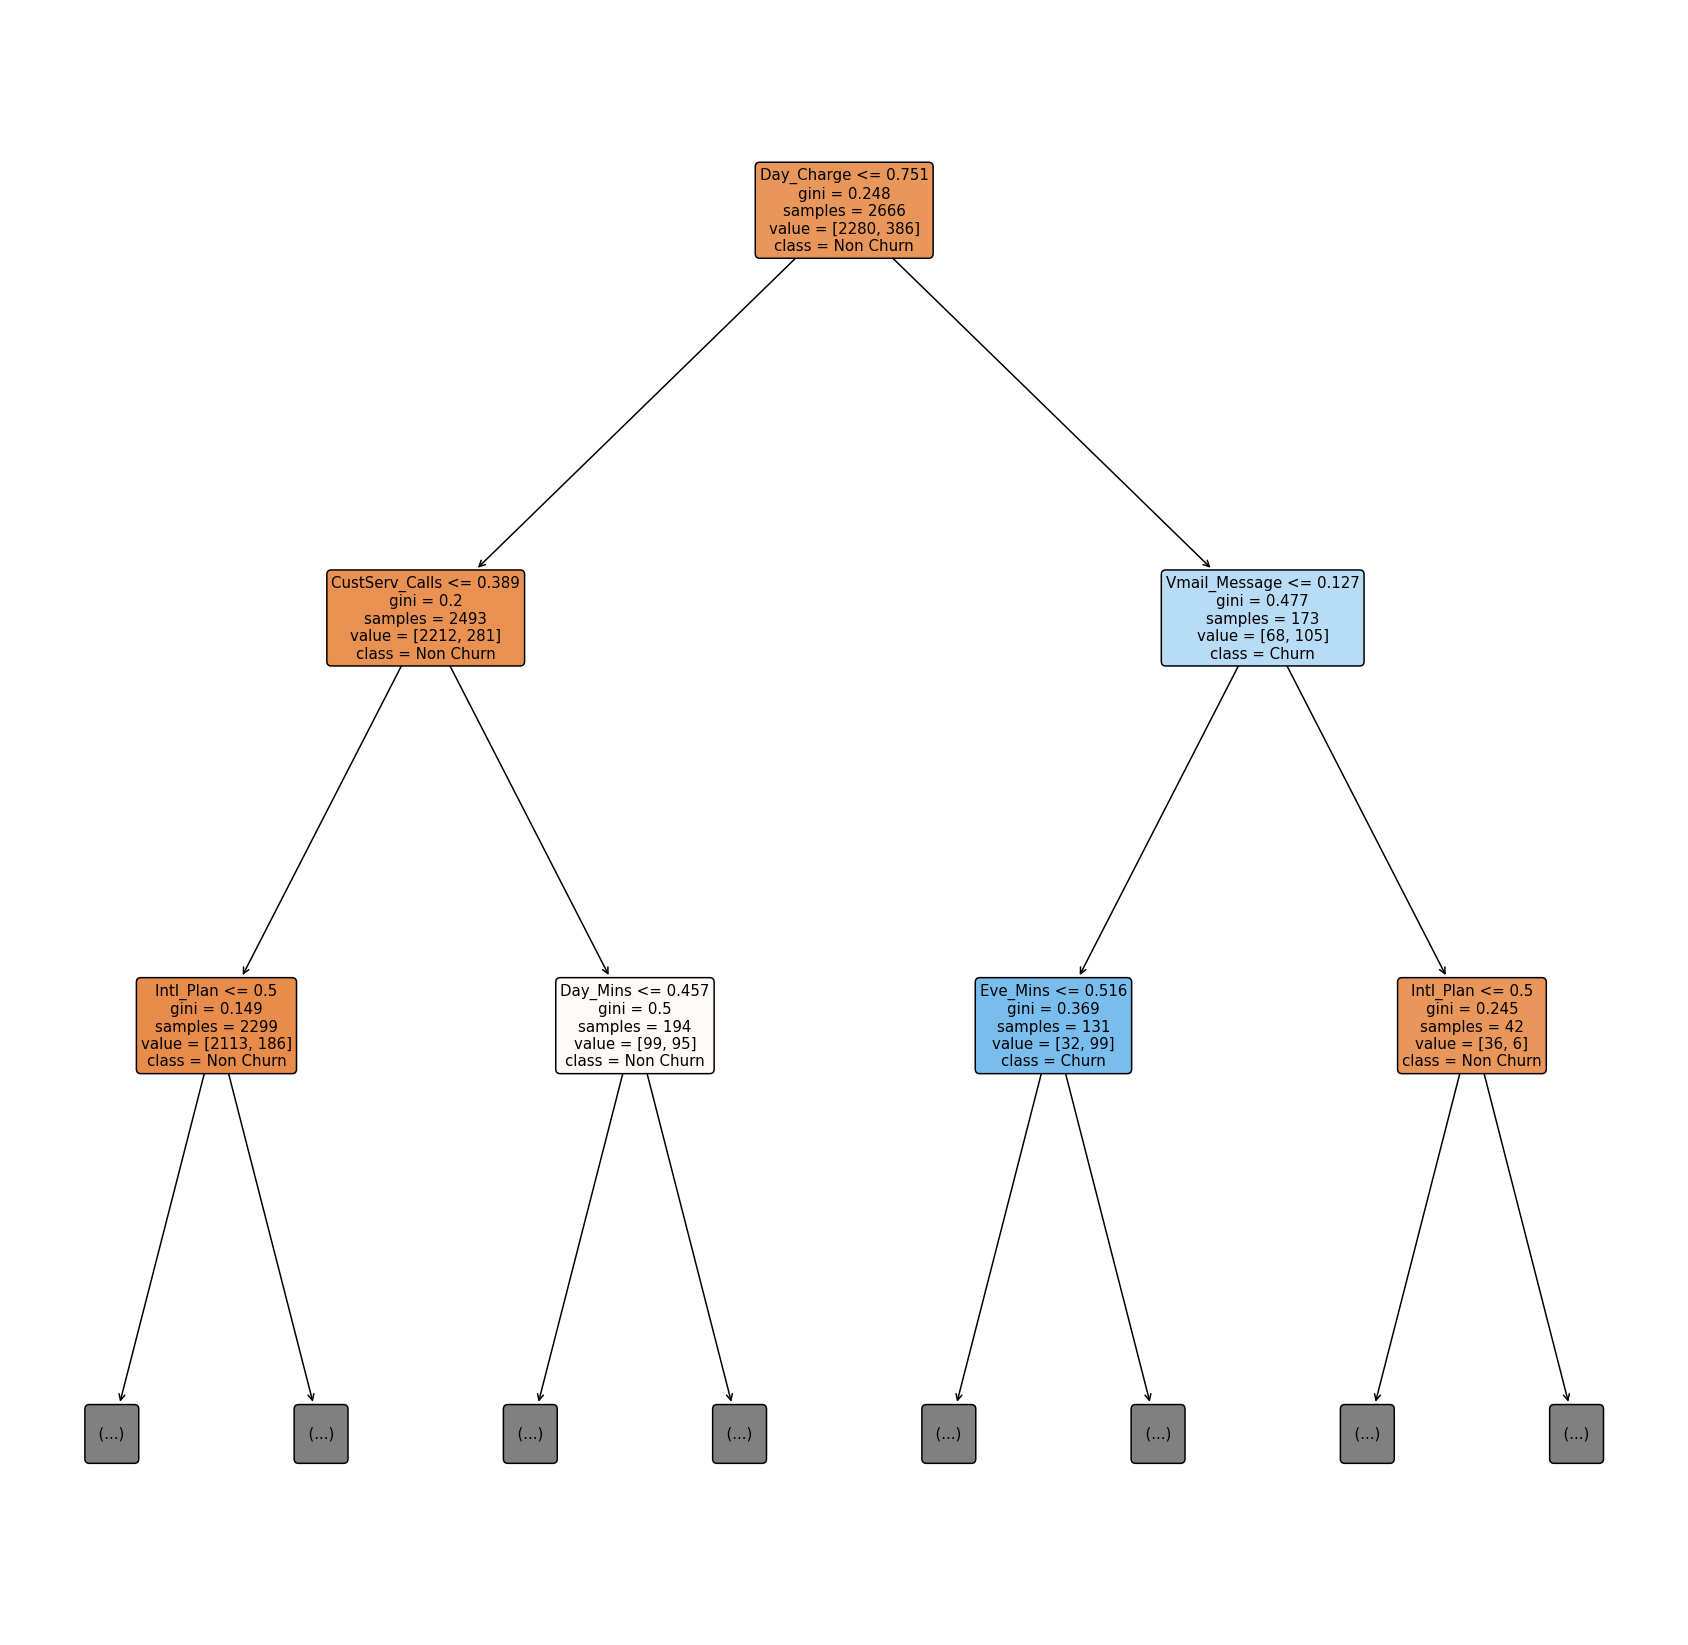

In [18]:
plt.figure(figsize=(30,30))
plot_tree(model,
          filled=True,
          rounded=True,
          class_names=["Non Churn", "Churn"],
          feature_names = X.columns,
          max_depth=2,
          fontsize=15)

plt.show()

#### Perform Grid Search and Cross-Validation

In [19]:
parameters = {'criterion': ['gini','entropy'],
              'max_features': ['auto'],
              'max_depth': [3, 4, 5, 6, 7],
              }

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [20]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth','mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
4,gini,7,0.914475,0.015877,1
9,entropy,7,0.907352,0.014271,2
8,entropy,6,0.905102,0.005748,3
3,gini,6,0.903974,0.008365,4
7,entropy,5,0.897224,0.007905,5
2,gini,5,0.896844,0.010791,6
1,gini,4,0.882968,0.007698,7
6,entropy,4,0.882965,0.009739,8
5,entropy,3,0.869463,0.010835,9
0,gini,3,0.859347,0.012525,10


Index(['param_criterion', 'param_max_depth', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


#### Best hyperparameters in the grid search

In [21]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [22]:
y_pred2 = grid_result.predict(X_test)
y_test['probability'] = np.round(grid_result.predict_proba(X_test)[:,1], 2)
y_test['predicted_churn'] = y_pred2

display(y_test.head(10))

,Churn,probability,predicted_churn
2794,1.0,0.05,0.0
2619,1.0,1.00,1.0
720,0.0,0.03,0.0
371,0.0,0.03,0.0
57,1.0,0.03,0.0
1294,0.0,0.06,0.0
155,0.0,0.06,0.0
1275,0.0,0.03,0.0
2830,0.0,0.03,0.0
2924,1.0,0.81,1.0


#### Model performance evaluation with the best found model in grid search and cross-validation

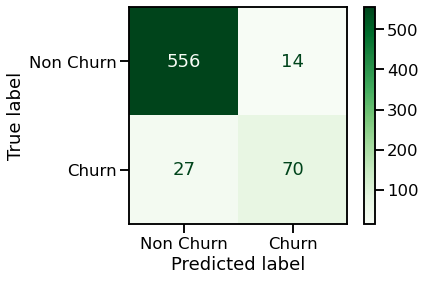

In [23]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["Non Churn", "Churn"],
                      cmap='Greens')
plt.show()

#### Classification report

In [24]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       570
         1.0       0.83      0.72      0.77        97

    accuracy                           0.94       667
   macro avg       0.89      0.85      0.87       667
weighted avg       0.94      0.94      0.94       667



#### Accuracy, precision, recall, f1 score

**Comment**: Looking at the above classification report we observe 
<br>Precision - the fitted classificiation model classified 83% churn customers. 
<br>Recall - Among those who had churned this classification identified 72% of them.
<br>f1-score - The harmonic mean of precision and recall for churned customer by this model is 77%.
<br>Accuracy - overall accuracy is 94% which we may use for comparison with anyother type of models with this classification

#### ROC - AUC

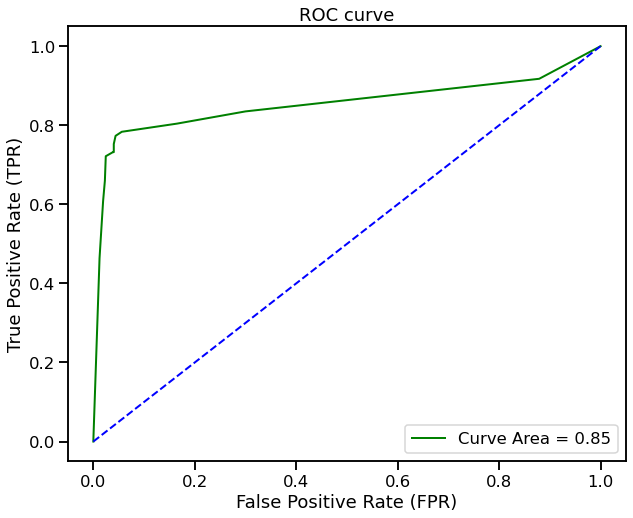

In [25]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
4,0.81,0.024561,0.721649
5,0.25,0.038596,0.731959
6,0.20,0.040351,0.731959
7,0.19,0.040351,0.752577
8,0.15,0.043860,0.773196
9,0.13,0.056140,0.783505
10,0.06,0.164912,0.804124
11,0.05,0.300000,0.835052
12,0.03,0.878947,0.917526
13,0.00,1.000000,1.000000


**Comment**: The result of ROC and AUC can be used in next phase for model selection.